In [20]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [21]:
#generate the sample
def gen_data():
    N = 5000
    beta = 3
    x = np.random.normal(loc=0.0, scale=.5, size=N)
    e = np.random.normal(loc=0.0, scale=1.0, size=N)
    y = 1*(1 + beta * x + e >= 0) 
    return y,x,N

In [22]:
#visualize the guassian process
def gen_llr():
    y,x,N = gen_data()
    ll1 = []
    ll2 = []
    rescale = []
    n0 = 600
    skip = 200

    for n in range(n0,N,skip):
        xn = x[1:n+1]
        yn = y[1:n+1]
    
        model1 = sm.Probit(yn,sm.add_constant(xn))
        model1 = model1.fit(disp=False)
        pr1 = yn*(yn - model1.resid_response) + (1-yn)*(1- (yn - model1.resid_response))
        ll1.append( np.log(pr1).sum() )
                       
                       
        model2 = sm.Probit(yn,np.ones(len(xn)))
        model2 = model2.fit(disp=False)
        pr2 = yn*(yn - model2.resid_response) + (1-yn)*(1- (yn - model2.resid_response))
        ll2.append( np.log(pr2).sum() )
       
        rescale.append( ( (np.log(pr1) - np.log(pr2))**2 ).mean() )
    return ll1, ll2, rescale, n0, N, skip


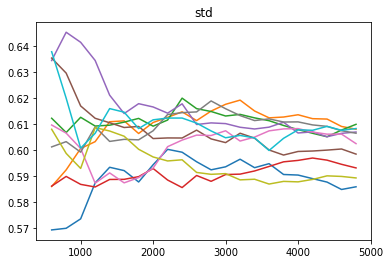

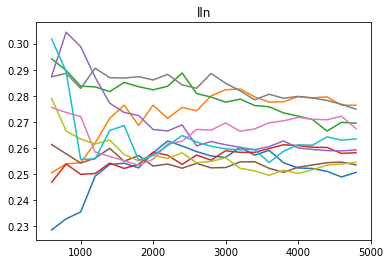

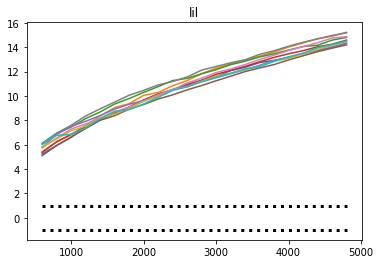

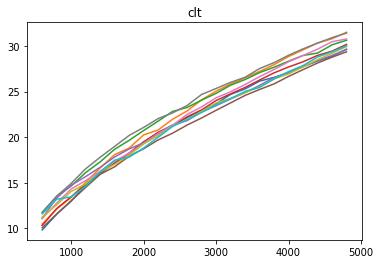

In [27]:
for i in range(10):
    ll1, ll2, rescale, n0, N, skip = gen_llr()

    scale = np.arange(n0,N,skip)
    process =  (np.array(ll1) - np.array(ll2))
    std_process = np.sqrt(np.array(rescale))
    
    plt.figure(4)
    plt.title("std")
    plt.plot(scale, std_process)
    
    #scale by 1/n
    plt.figure(1)
    plt.title("lln")
    plt.plot(scale, process/scale )

    #scale by root
    plt.figure(2)
    plt.title("lil")
    plt.plot(scale,  (process/scale)/ ( np.sqrt( 2*np.log(np.log(scale))/scale )*std_process ) )

    #scale by root n
    plt.figure(3)
    plt.title("clt")
    plt.plot(scale, np.sqrt(scale) * (process/scale)/std_process )


plt.figure(2)
plt.plot(scale,np.ones(scale.shape[0]),  color='black', linewidth=3, linestyle=":" )
plt.plot(scale,-1*np.ones(scale.shape[0]),  color='black', linewidth=3, linestyle=":" )

plt.show()

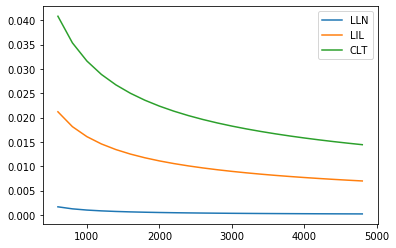

In [24]:
#scale by 1/n
plt.plot(scale,1/scale,label="LLN")

#scale by root
plt.plot(scale, 1/ np.sqrt(2*scale*np.log(np.log(scale))), label="LIL")

#scale by root n
plt.plot(scale, 1/np.sqrt(scale),label="CLT")

plt.legend()
plt.show()